In [1]:
import seaborn as sns
import pandas as pd
import numpy as np

import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.colors import ListedColormap, LinearSegmentedColormap

# from mpl_toolkits.axes_grid1.inset_locator import zoomed_inset_axes
# from mpl_toolkits.axes_grid1.inset_locator import mark_inset
import matplotlib.gridspec as gridspec

# import scanpy as sc
# import squidpy as sq

In [2]:
font_size = 5
rc={'font.size': font_size, 'axes.labelsize': font_size, 'figure.dpi':400, 'axes.linewidth':0.5,
    'axes.titlesize': font_size, 'xtick.labelsize': font_size, 'ytick.labelsize': font_size, 'legend.fontsize':font_size, 
    'legend.loc': 'center right',
    'legend.borderpad':0,
    'legend.columnspacing': 0.5,
    'legend.labelspacing': 0.2,
    'legend.handletextpad': 0,
    'legend.borderaxespad': 0,
    'legend.handleheight': 0.5,
    'legend.handlelength': 1.0,
}

sns.set(style='ticks',rc=rc) #talk, ticks, paper
sns.set_context("paper")

mpl.rcParams['pdf.fonttype'] = 42
mpl.rcParams['ps.fonttype'] = 42

mpl.rcParams['font.sans-serif'] = "Arial"
mpl.rcParams['font.family'] = "sans-serif"
plt.rcParams['axes.unicode_minus']=False # negative minus sign

centimeter = 1/2.54  # centimeter in inches

In [3]:
pvalue_lr = pd.read_csv('../../result/cci/MB/cci/MB_pvalue_lr.csv', index_col=0)

In [25]:
pvalue_lr

,0|0,0|1,0|10,0|11,0|12,0|13,0|14,0|15,0|16,0|17,...,9|18,9|19,9|2,9|3,9|4,9|5,9|6,9|7,9|8,9|9
Jag2|Notch1,1.000000,1.000000,1.0,1.000000,1.000000,1.0,1.000000,1.000000,1.0,1.0,...,0.570714,0.029593,1.0000,1.000000,0.000000,0.000000,0.020487,1.000000,1.000000,0.079404
Dll1|Notch1,1.000000,1.000000,1.0,1.000000,1.000000,1.0,0.511859,1.000000,1.0,1.0,...,1.000000,0.068000,1.0000,1.000000,0.013542,0.000000,0.042371,1.000000,1.000000,0.257859
Jag1|Notch1,1.000000,0.346233,1.0,0.902574,0.625968,1.0,0.063079,1.000000,1.0,1.0,...,1.000000,0.162116,1.0000,1.000000,0.022194,0.042727,0.056667,1.000000,1.000000,0.686389
Tnf|Notch1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Dll4|Notch1,1.000000,1.000000,1.0,1.000000,1.000000,1.0,0.389078,1.000000,1.0,1.0,...,1.000000,0.073378,1.0000,1.000000,0.013542,0.000000,0.042371,1.000000,1.000000,0.302143
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Tslp|Tslp,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Ddr1|Ttr,0.360839,1.000000,1.0,0.000000,1.000000,0.0,0.053986,0.628843,1.0,0.0,...,1.000000,1.000000,0.0000,1.000000,0.000000,1.000000,0.000000,1.000000,1.000000,1.000000
Copa|Mtnr1b,NaN,NaN,1.0,NaN,1.000000,NaN,NaN,NaN,1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,0.177556,0.219725,NaN,NaN,0.241558
Copa|P2ry6,1.000000,1.000000,1.0,1.000000,1.000000,1.0,0.997478,1.000000,1.0,1.0,...,0.206848,0.451791,0.1645,0.273455,0.117747,0.160394,0.073592,0.505250,0.855596,0.313657


In [102]:
LR_list_ = []
clusters_lr_count = pd.DataFrame(columns=[['source', 'target', 'counts']])
for i in range(pvalue_lr.shape[1]):
    source_cluster = pvalue_lr.columns[i].split("|")[0]
    target_cluster = pvalue_lr.columns[i].split("|")[1]
    i_count_LR = (pvalue_lr.iloc[:,i] < 0.05).sum()
    if source_cluster in ['5', '12', '10', '16', '7', '8', '14', '4', '11', '17', '0', '15'] \
    and target_cluster in ['5', '12', '10', '16', '7', '8', '14', '4', '11', '17', '0', '15']:    ####仅计算所有ROI的LR count **unique
        LR_list_.extend(list(set(pvalue_lr.index[pvalue_lr.iloc[:,i] < 0.05])))
    clusters_lr_c_ = pd.DataFrame([[source_cluster, target_cluster, i_count_LR]], columns=[['source', 'target', 'counts']])
#     clusters_lr_count.append(clusters_lr_c_)
    clusters_lr_count = pd.concat([clusters_lr_count, clusters_lr_c_], axis=0, ignore_index=True)

In [103]:
len(set(LR_list_))

576

In [4]:
# clusters_lr_count = pd.DataFrame(columns=[['source', 'target', 'counts']])
# for i in range(pvalue_lr.shape[1]):
#     source_cluster = pvalue_lr.columns[i].split("|")[0]
#     target_cluster = pvalue_lr.columns[i].split("|")[1]
#     i_count_LR = (pvalue_lr.iloc[:,i] < 0.05).sum()
#     clusters_lr_c_ = pd.DataFrame([[source_cluster, target_cluster, i_count_LR]], columns=[['source', 'target', 'counts']])
# #     clusters_lr_count.append(clusters_lr_c_)
#     clusters_lr_count = pd.concat([clusters_lr_count, clusters_lr_c_], axis=0, ignore_index=True)

In [104]:
clusters_lr_count

,source,target,counts
0,0,0,67
1,0,1,90
2,0,10,119
3,0,11,66
4,0,12,106
...,...,...,...
395,9,5,194
396,9,6,134
397,9,7,123
398,9,8,87


In [26]:
# clusters_lr_count.to_csv('/media/bgi/liukeyin/SpaSEG/CCI/MB_bin200_interaction_count_network.csv')

In [6]:
cluster_cluster_c = clusters_lr_count.iloc[:,-1].values.reshape(20,20)  ###counts

In [7]:
cluster_cluster_c

array([[67, 90, 119, 66, 106, 40, 72, 76, 55, 64, 82, 58, 45, 75, 53,
        128, 83, 66, 58, 104],
       [75, 119, 133, 74, 131, 58, 98, 93, 73, 67, 107, 89, 68, 91, 69,
        151, 103, 73, 76, 115],
       [92, 109, 132, 83, 126, 64, 87, 89, 81, 73, 107, 79, 70, 96, 72,
        155, 133, 86, 76, 109],
       [48, 48, 64, 47, 72, 39, 25, 50, 27, 46, 54, 33, 29, 39, 33, 64,
        68, 35, 28, 50],
       [119, 152, 165, 96, 161, 76, 121, 121, 107, 91, 138, 119, 82, 113,
        86, 203, 145, 113, 105, 154],
       [45, 51, 70, 51, 69, 35, 32, 44, 34, 44, 51, 44, 38, 42, 28, 69,
        66, 39, 33, 54],
       [62, 88, 106, 64, 98, 48, 59, 80, 50, 56, 87, 54, 41, 73, 45, 131,
        90, 74, 52, 78],
       [60, 86, 98, 56, 97, 38, 55, 70, 50, 52, 73, 50, 42, 65, 40, 105,
        85, 51, 45, 73],
       [68, 96, 115, 64, 114, 41, 67, 78, 64, 50, 90, 57, 50, 81, 45,
        144, 102, 70, 58, 86],
       [49, 42, 66, 50, 72, 30, 28, 48, 23, 46, 48, 29, 25, 44, 32, 70,
        61, 28,

In [8]:
df = pd.DataFrame(cluster_cluster_c, 
                  index=np.unique(clusters_lr_count['source']).astype(int), 
                  columns=np.unique(clusters_lr_count['target']).astype(int))
df = df.astype(int)

In [9]:
new_index = np.arange(20)

df = df.reindex(new_index.tolist())
df = df.reindex(columns=new_index.tolist())

In [28]:
df.sum().sum()

31024

In [10]:
df

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,67,90,45,75,53,128,83,66,58,104,119,66,106,40,72,76,55,64,82,58
1,75,119,68,91,69,151,103,73,76,115,133,74,131,58,98,93,73,67,107,89
2,61,79,40,67,41,106,73,57,48,79,91,65,88,42,56,69,50,57,78,49
3,75,104,47,73,55,130,96,72,60,89,107,69,99,50,71,84,55,68,87,64
4,42,48,24,36,20,70,59,27,23,41,60,41,55,22,28,44,18,31,49,24
5,114,151,87,122,75,206,145,122,98,146,167,101,172,66,117,126,108,86,138,101
6,69,85,54,73,52,106,105,69,59,92,99,67,105,46,68,78,56,66,83,59
7,67,103,51,87,56,151,103,82,60,100,123,66,117,51,86,87,69,60,95,64
8,87,113,60,88,66,150,118,99,70,107,130,80,129,58,80,89,81,69,109,83
9,107,149,67,116,81,194,134,123,87,141,161,88,155,57,115,113,91,73,132,83


In [11]:
cluster_name = ['cluster 0',
'cluster 1',
'cluster 2',
'cluster 3',
'cluster 4',
'cluster 5',
'cluster 6',
'cluster 7',
'cluster 8',
'cluster 9',
'cluster 10',
'cluster 11',
'cluster 12',
'cluster 13',
'cluster 14',
'cluster 15',
'cluster 16',
'cluster 17',
'cluster 18',
'cluster 19',]

In [12]:
df.columns = cluster_name
df.index = cluster_name

In [16]:
# df.to_csv('/media/bgi/liukeyin/SpaSEG/CCI/MB_bin200_interaction_numbers.csv')

In [13]:
[5, 12, 10, 16, 7, 8, 14],  #Cortex
[4, 11, 17],  # HPC
[0, 15],  # Thalamus

([0, 15],)

In [14]:
df_1 = df.loc[['cluster 10', 'cluster 16', 'cluster 7', 'cluster 8', 'cluster 14', 'cluster 5', 'cluster 12', 
        'cluster 4', 'cluster 11', 'cluster 17', 
        'cluster 0', 'cluster 15'],
       ['cluster 10', 'cluster 16', 'cluster 7', 'cluster 8', 'cluster 14', 'cluster 5', 'cluster 12',  
        'cluster 4', 'cluster 11', 'cluster 17', 
        'cluster 0', 'cluster 15']]

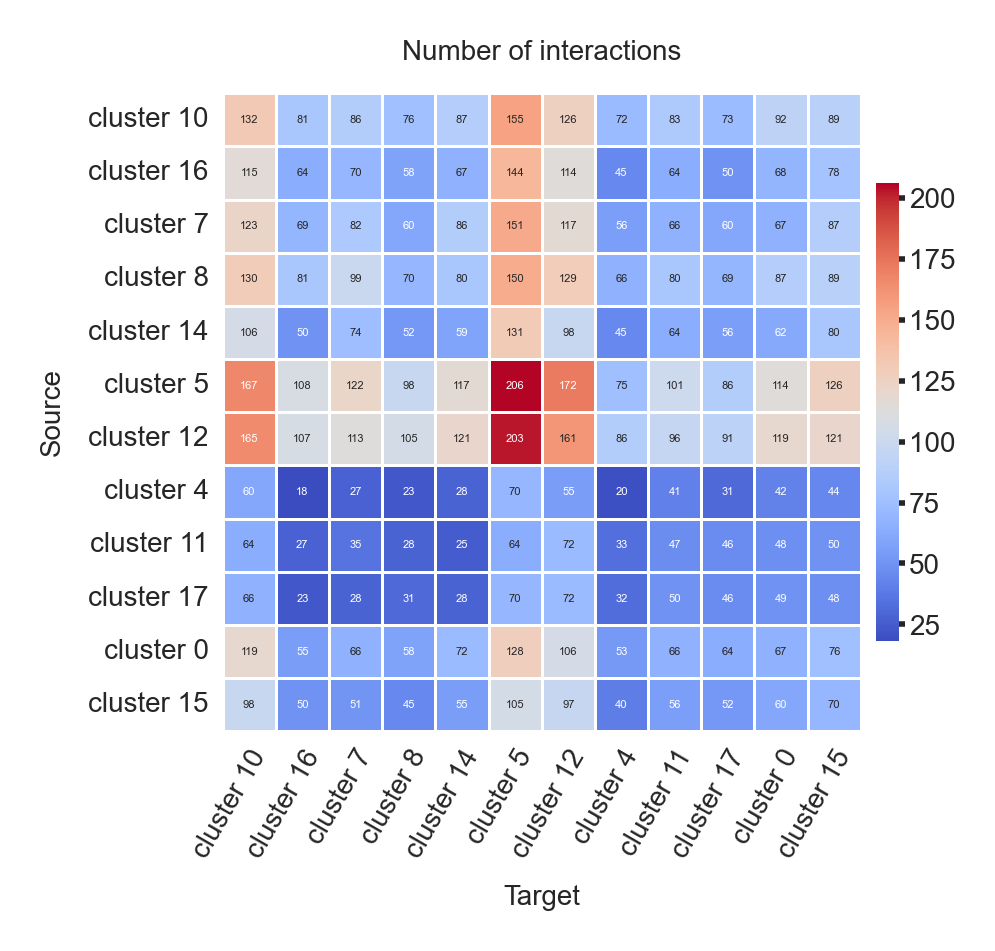

In [98]:
fig, ax_c = plt.subplots(figsize=(6.3*centimeter, 6.3*centimeter), dpi=400)

fig_C = sns.heatmap(df_1, 
                    linewidths=0.5, 
#                     linecolor='black',
                    cmap = 'coolwarm', 
                    square = True, 
                    ax = ax_c, 
                    cbar_kws = {'shrink': 0.6, 'pad': 0.02},
#                     annot = True,
#                     annot_kws= {'fontsize':2,},
#                     fmt='g'
                   )
ax_c.set_title("Number of interactions", fontsize=5)
ax_c.tick_params(direction='out', labelsize=4, length=2.0, width=0.25, 
               top=False, right=False, left=False, bottom=False, pad=0.5,
               grid_alpha=0, labelleft=True, labelright=False)
plt.yticks(fontsize=5)
plt.xticks(rotation=60, ha='right', rotation_mode="anchor", fontsize=5)
plt.xlabel('Target', fontsize=5)
plt.ylabel('Source', fontsize=5)

cbar = fig_C.collections[0].colorbar
cbar.ax.tick_params(labelsize=5, length=1.0, pad=0.8)
# plt.savefig('/media/bgi/liukeyin/SpaSEG/cci/Fig5/Fig5_number_of_interactions_heatmap.pdf', bbox_inches='tight', format='pdf', dpi=400)

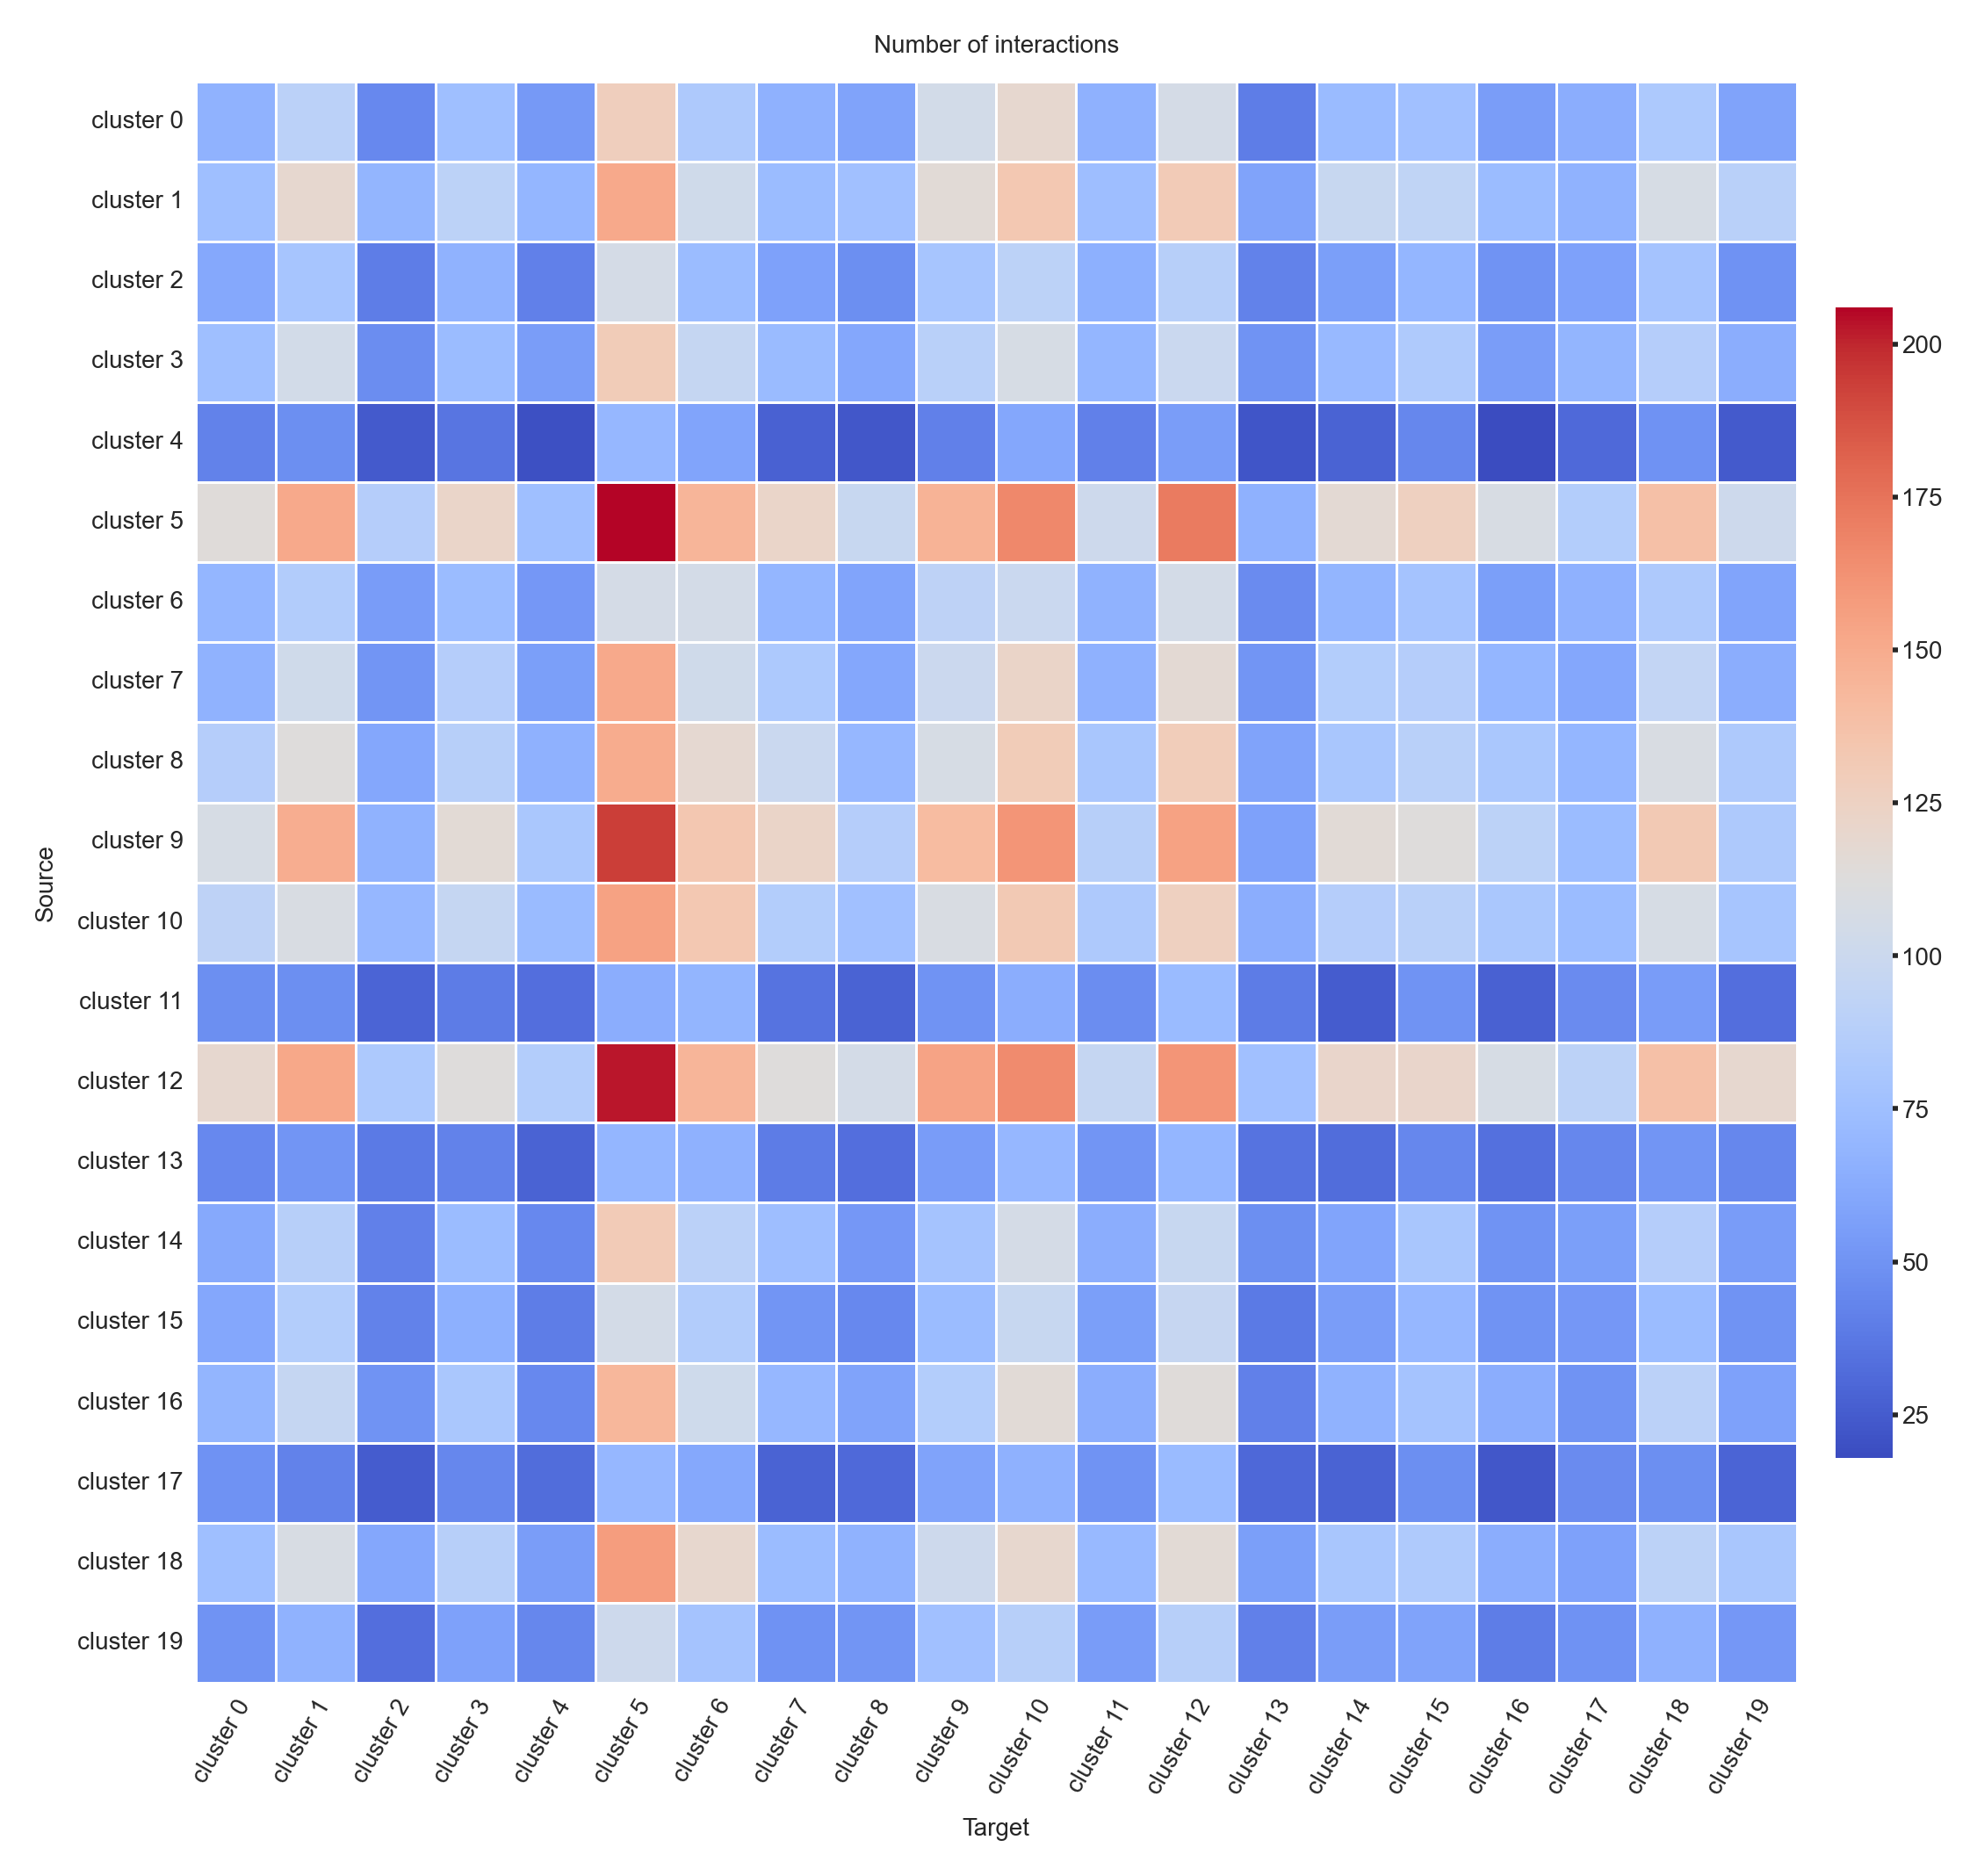

In [22]:
fig, ax_c = plt.subplots(figsize=(18*centimeter, 18*centimeter), dpi=400)

fig_C = sns.heatmap(df, 
                    linewidths=0.5, 
#                     linecolor='black',
                    cmap = 'coolwarm', 
                    square = True, 
                    ax = ax_c, 
                    cbar_kws = {'shrink': 0.6, 'pad': 0.02},
#                     annot = True,
#                     annot_kws= {'fontsize':3},
#                     fmt='g'
                   )
ax_c.set_title("Number of interactions", fontsize=5)
ax_c.tick_params(direction='out', labelsize=4, length=2.0, width=0.25, 
               top=False, right=False, left=False, bottom=False, pad=0.5,
               grid_alpha=0, labelleft=True, labelright=False)
plt.yticks(fontsize=5)
plt.xticks(rotation=60, ha='right', rotation_mode="anchor", fontsize=5)
plt.xlabel('Target', fontsize=5)
plt.ylabel('Source', fontsize=5)

cbar = fig_C.collections[0].colorbar
cbar.ax.tick_params(labelsize=5, length=1.0, pad=0.8)
plt.savefig('./supp_Fig5_all_number_of_interactions_heatmap.pdf', bbox_inches='tight', format='pdf', dpi=400)